In [1]:
#Importing required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv('telecom_churn_data.csv',encoding='ISO-8859-1')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
#Find the non null count
data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [5]:
#Find the mobile number data is unique or having na or duplicated
len(data['mobile_number'].unique())

99999

In [6]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [7]:
# look at missing value ratio in each column
round(data.isnull().sum()*100/data.shape[0],2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

## Impute Missing values

In [8]:
custdata = data.copy()

#### Impute the missing values for data recharge

In [9]:
cust_rechData = []
data.columns
for i in range (0,len(data.columns)):
    if data.columns[i].find('rech') != -1 :
        colName = data.columns[i]
        if 'date' not in colName:
            cust_rechData.append(data.columns[i])        
print(cust_rechData)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


In [10]:
custdata[cust_rechData].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [11]:
custdata.loc[custdata.total_rech_data_6.isnull() & custdata.date_of_last_rech_data_6.isnull(), 
             ["total_rech_data_6", "date_of_last_rech_data_6"]].head(10)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [12]:
custdata.loc[~custdata.total_rech_amt_6.isnull() & ~custdata.date_of_last_rech_6.isnull() &
             ~custdata.max_rech_amt_6.isnull()  , 
             ["total_rech_amt_6", "date_of_last_rech_6", "max_rech_amt_6"]].head(10)

,total_rech_amt_6,date_of_last_rech_6,max_rech_amt_6
0,362,6/21/2014,252
1,74,6/29/2014,44
2,168,6/17/2014,86
3,230,6/28/2014,60
4,196,6/26/2014,56
5,120,6/19/2014,120
6,499,6/28/2014,90
7,1580,6/27/2014,1580
8,437,6/25/2014,90
9,220,6/29/2014,110


In [13]:
custdata[cust_rechData] = custdata[cust_rechData].apply(lambda x: x.fillna(0))

In [14]:
# Check the values are imputed correctly
print('Missing value ratio:: ')
print(round(custdata[cust_rechData].isnull().sum()*100/custdata.shape[1]),2)

Missing value ratio:: 
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
count_rech_3g_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64 2


In [15]:
custdata[cust_rechData].head(10)

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,4,3,2,6,362,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0
1,4,9,11,5,74,384,283,121,44,154,65,50,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,50.0,0.0
2,5,4,2,7,168,315,116,358,86,200,86,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
3,10,11,18,14,230,310,601,410,60,50,50,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,6,3,4,196,350,287,200,56,110,110,50,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0
5,2,2,3,3,120,0,130,130,120,0,130,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,15,10,11,7,499,222,294,141,90,37,50,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,19,21,14,15,437,601,120,186,90,154,30,36,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0
9,4,2,5,3,220,195,210,180,110,154,50,130,0.0,1.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0


In [16]:
# Check the data recharge imputation
print("Missing value :\n")
print(custdata[cust_rechData].isnull().sum()*100/custdata.shape[1])

Missing value :

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
count_rech_3g_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64


In [17]:
#Summary
custdata[cust_rechData].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,0.619726,0.681837,0.698517,0.632806,31.792048,32.406314,33.113011,32.387644,0.469025,0.522855,0.531075,0.461885,0.150702,0.158982,0.167442,0.170922,48.445409,51.393440,52.027022,49.961089
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,1.760541,1.924382,1.963417,1.669040,77.248778,78.342435,78.872739,78.818696,1.521915,1.659925,1.654565,1.371526,0.689999,0.755537,0.782059,0.774557,127.743863,132.629365,131.182609,127.804280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,1.000000,1.000000,1.000000,1.000000,8.000000,14.000000,17.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.250000,17.000000,23.000000,17.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


#### Check the significance of date columns

In [18]:
cust_rechDate = []
data.columns
for i in range (0,len(data.columns)):
    colName = data.columns[i]
    if 'date' in colName:
        cust_rechDate.append(data.columns[i])        
print(cust_rechDate)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [19]:
# Check the data recharge imputation
print("Missing value :\n")
print(round(custdata[cust_rechDate].isnull().sum()*100/custdata.shape[1]),2)

Missing value :

last_date_of_month_6            0.0
last_date_of_month_7          266.0
last_date_of_month_8          487.0
last_date_of_month_9          734.0
date_of_last_rech_6           711.0
date_of_last_rech_7           782.0
date_of_last_rech_8          1603.0
date_of_last_rech_9          2106.0
date_of_last_rech_data_6    33118.0
date_of_last_rech_data_7    32933.0
date_of_last_rech_data_8    32593.0
date_of_last_rech_data_9    32777.0
dtype: float64 2


Dates are based on the recharge amount for calls and data. Hence dropping the dates columns

In [20]:
custdata.drop(cust_rechDate,axis=1,inplace=True)

#### Id's are not significant Hence dropping those columns

In [21]:
custdata.drop(['mobile_number','circle_id'],axis=1,inplace=True)

In [22]:
custdata.shape

(99999, 212)

In [23]:
custdata.head(10)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,0.0,0.0,0.0,3

In [24]:
print(custdata['fb_user_6'].unique())
print(custdata['fb_user_7'].unique())
print(custdata['fb_user_8'].unique())
print(custdata['fb_user_9'].unique())

[ 1. nan  0.]
[ 1. nan  0.]
[ 1. nan  0.]
[nan  1.  0.]


In [25]:
print(custdata['sachet_3g_6'].unique())
print(custdata['sachet_3g_7'].unique())
print(custdata['sachet_3g_8'].unique())
print(custdata['sachet_3g_9'].unique())

[ 0  1  3  8  2  4  6  5 10 22  7 13 29 16 18 12 11  9 23 14 19 15 21 17
 28]
[ 0  3  1  4  2  5  7 20 15  6  9 11  8 10 12 17 22 18 13 21 24 14 35 19
 33 16 31]
[ 0  1  3  2  5  4  7 23 27 13  6  8 10 21 12 25 15  9 14 38 19 18 11 17
 20 16 30 29 41]
[ 0  1  3  5  2  4  8 11 49 22  6 10 12  7 23 19 21  9 13 15 36 14 26 16
 18 27 24]


In [26]:
print(custdata['night_pck_user_6'].unique())
print(custdata['night_pck_user_7'].unique())
print(custdata['night_pck_user_8'].unique())
print(custdata['night_pck_user_9'].unique())

[ 0. nan  1.]
[ 0. nan  1.]
[ 0. nan  1.]
[nan  0.  1.]


In [27]:
print(custdata['monthly_2g_6'].unique())
print(custdata['monthly_2g_7'].unique())
print(custdata['monthly_2g_8'].unique())
print(custdata['monthly_2g_9'].unique())

[0 1 2 3 4]
[0 1 2 5 4 3]
[0 1 2 5 3 4]
[0 2 1 3 4]


From the above observation, night_pck_users columns and fb_user columns can be considered as categorical values. 
Hence impute the null values as -1

In [28]:
Categ_Col = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [29]:
# replace missing values with '-1' in categorical columns
custdata[Categ_Col] = custdata[Categ_Col].apply(lambda x: x.fillna(-1))

In [30]:
print(custdata['night_pck_user_6'].unique())
print(custdata['night_pck_user_7'].unique())
print(custdata['night_pck_user_8'].unique())
print(custdata['night_pck_user_9'].unique())
print(custdata['fb_user_6'].unique())
print(custdata['fb_user_7'].unique())
print(custdata['fb_user_8'].unique())
print(custdata['fb_user_9'].unique())

[ 0. -1.  1.]
[ 0. -1.  1.]
[ 0. -1.  1.]
[-1.  0.  1.]
[ 1. -1.  0.]
[ 1. -1.  0.]
[ 1. -1.  0.]
[-1.  1.  0.]


In [31]:
initialCols = custdata.shape[1]

In [32]:
initialCols

212

In [33]:
initialCols = custdata.shape[1]

In [34]:
Max_value = 0.7
initialCols = list(custdata.apply(lambda column: True if column.isnull().sum()/custdata.shape[0] < Max_value else False))
dropMissing = pd.DataFrame({'features':custdata.columns , 'include': initialCols})
dropMissing.loc[dropMissing.include == True,:]


,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [35]:
custdata.columns.values

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9

In [36]:
print(custdata.arpu_6.isnull().sum())
print(custdata.arpu_7.isnull().sum())
print(custdata.arpu_8.isnull().sum())
print(custdata.arpu_9.isnull().sum())

0
0
0
0


In [37]:
print(custdata.total_rech_amt_6.isnull().sum())
print(custdata.total_rech_amt_7.isnull().sum())
print(custdata.total_rech_amt_8.isnull().sum())
print(custdata.total_rech_amt_9.isnull().sum())  

0
0
0
0


In [38]:
print(custdata.total_rech_data_6.isnull().sum())
print(custdata.total_rech_data_7.isnull().sum())
print(custdata.total_rech_data_8.isnull().sum())
print(custdata.total_rech_data_9.isnull().sum()) 

0
0
0
0


In [39]:
print(custdata.total_rech_data_6.unique())
print(custdata.av_rech_amt_data_6.unique())

[ 1.  0.  3.  5.  4.  2.  6.  8.  7. 12. 16. 11. 10. 14. 20.  9. 18. 29.
 23. 15. 22. 27. 17. 21. 13. 19. 35. 25. 33. 61. 55. 24. 26. 28. 40. 32.
 46. 34.]
[2.5200e+02 0.0000e+00 5.6000e+01 1.5400e+02 6.4000e+01 1.0570e+03
 2.7400e+02 1.9800e+02 8.6000e+01 1.4000e+01 3.0800e+02 1.3110e+03
 1.7900e+02 7.5000e+01 9.8000e+01 1.2500e+02 1.3700e+02 2.0300e+02
 1.4500e+02 1.5000e+02 5.0000e+01 2.8500e+02 4.6000e+01 3.0400e+02
 2.3000e+01 3.9600e+02 1.7000e+01 5.0400e+02 9.1000e+01 1.7500e+02
 1.8200e+02 1.8900e+02 2.5000e+01 2.0400e+02 1.1500e+02 6.5500e+02
 1.6400e+02 3.4000e+01 1.4900e+02 2.9000e+01 1.7700e+02 1.0000e+02
 3.3000e+01 6.8000e+01 4.0000e+02 8.1000e+01 2.2400e+02 2.7500e+02
 1.9600e+02 3.2300e+02 8.2000e+01 6.6660e+01 4.5500e+02 3.0000e+02
 8.8000e+01 9.6000e+01 1.6900e+02 4.5000e+01 8.0000e+00 2.9000e+02
 7.5600e+02 2.6300e+02 7.8000e+01 1.0100e+02 2.2900e+02 6.7000e+01
 9.2000e+01 2.5000e+02 1.2300e+02 2.1200e+02 7.0100e+02 2.8000e+01
 4.5300e+02 3.7900e+02 1.0000e+00 1.2000

### Filtering High Value customers

Calculate the total amount of recharge for data and calls

In [40]:
#Calculate the data recharge 
custdata['total_data_rech_6'] = custdata.total_rech_data_6 * custdata.av_rech_amt_data_6
custdata['total_data_rech_7'] = custdata.total_rech_data_7 * custdata.av_rech_amt_data_7

In [41]:
#calculate the total amount data
custdata['amt_data_6'] = custdata.total_rech_amt_6 + custdata.total_data_rech_6
custdata['amt_data_7'] = custdata.total_rech_amt_7 + custdata.total_data_rech_7

In [42]:
# calculate average recharge done by customer in June and July
custdata['av_amt_data_6_7'] = (custdata.amt_data_6 + custdata.amt_data_7)/2

In [43]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(custdata.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [44]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
filteredData = custdata.loc[custdata.av_amt_data_6_7 >= custdata.av_amt_data_6_7.quantile(0.7), :]
filteredData = filteredData.reset_index(drop=True)
filteredData.shape

(30001, 217)

In [45]:
# delete variables created to filter high-value customers
filteredData = filteredData.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
filteredData.shape

(30001, 212)

Now, 30,001 rows after selecting the customers who have provided recharge value of more than or equal 
to the recharge value of the 70th percentile customer

### Derive the Churn Variable 

In [46]:
# calculating total incoming and outgoing minutes of usage
filteredData['total_calls_mou_9'] = filteredData.total_ic_mou_9 + filteredData.total_og_mou_9

In [47]:
# calculating 2g and 3g data consumption
filteredData['total_internet_mb_9'] =  filteredData.vol_2g_mb_9 + filteredData.vol_3g_mb_9

#### create churn variable: 
Customers who did not use calls or internet in the month of September are considered as churned customers

0 - Not Churn

1 - Churn

In [48]:
filteredData['churn'] = filteredData.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [49]:
# Removing the derived variables
filteredData = filteredData.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [50]:
filteredData.churn = filteredData.churn.astype("category")

print("Churn Ratio:")
print(filteredData.churn.value_counts()*100/filteredData.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [51]:
filteredData['arpu_diff'] = filteredData.arpu_8 - ((filteredData.arpu_6 + filteredData.arpu_7)/2)
filteredData['onnet_mou_diff'] = filteredData.onnet_mou_8 - ((filteredData.onnet_mou_6 + filteredData.onnet_mou_7)/2)
filteredData['offnet_mou_diff'] = filteredData.offnet_mou_8 - ((filteredData.offnet_mou_6 + filteredData.offnet_mou_7)/2)
filteredData['roam_ic_mou_diff'] = filteredData.roam_ic_mou_8 - ((filteredData.roam_ic_mou_6 + filteredData.roam_ic_mou_7)/2)
filteredData['roam_og_mou_diff'] = filteredData.roam_og_mou_8 - ((filteredData.roam_og_mou_6 + filteredData.roam_og_mou_7)/2)


In [52]:
filteredData['loc_og_mou_diff'] = filteredData.loc_og_mou_8 - ((filteredData.loc_og_mou_6 + filteredData.loc_og_mou_7)/2)
filteredData['std_og_mou_diff'] = filteredData.std_og_mou_8 - ((filteredData.std_og_mou_6 + filteredData.std_og_mou_7)/2)
filteredData['isd_og_mou_diff'] = filteredData.isd_og_mou_8 - ((filteredData.isd_og_mou_6 + filteredData.isd_og_mou_7)/2)
filteredData['spl_og_mou_diff'] = filteredData.spl_og_mou_8 - ((filteredData.spl_og_mou_6 + filteredData.spl_og_mou_7)/2)
filteredData['total_og_mou_diff'] = filteredData.total_og_mou_8 - ((filteredData.total_og_mou_6 + filteredData.total_og_mou_7)/2)


In [53]:
filteredData['loc_ic_mou_diff'] = filteredData.loc_ic_mou_8 - ((filteredData.loc_ic_mou_6 + filteredData.loc_ic_mou_7)/2)
filteredData['std_ic_mou_diff'] = filteredData.std_ic_mou_8 - ((filteredData.std_ic_mou_6 + filteredData.std_ic_mou_7)/2)
filteredData['isd_ic_mou_diff'] = filteredData.isd_ic_mou_8 - ((filteredData.isd_ic_mou_6 + filteredData.isd_ic_mou_7)/2)
filteredData['spl_ic_mou_diff'] = filteredData.spl_ic_mou_8 - ((filteredData.spl_ic_mou_6 + filteredData.spl_ic_mou_7)/2)
filteredData['total_ic_mou_diff'] = filteredData.total_ic_mou_8 - ((filteredData.total_ic_mou_6 + filteredData.total_ic_mou_7)/2)



In [54]:
filteredData['total_rech_num_diff'] = filteredData.total_rech_num_8 - ((filteredData.total_rech_num_6 + filteredData.total_rech_num_7)/2)
filteredData['total_rech_amt_diff'] = filteredData.total_rech_amt_8 - ((filteredData.total_rech_amt_6 + filteredData.total_rech_amt_7)/2)
filteredData['max_rech_amt_diff'] = filteredData.max_rech_amt_8 - ((filteredData.max_rech_amt_6 + filteredData.max_rech_amt_7)/2)
filteredData['total_rech_data_diff'] = filteredData.total_rech_data_8 - ((filteredData.total_rech_data_6 + filteredData.total_rech_data_7)/2)
filteredData['max_rech_data_diff'] = filteredData.max_rech_data_8 - ((filteredData.max_rech_data_6 + filteredData.max_rech_data_7)/2)


In [55]:
filteredData['av_rech_amt_data_diff'] = filteredData.av_rech_amt_data_8 - ((filteredData.av_rech_amt_data_6 + filteredData.av_rech_amt_data_7)/2)
filteredData['vol_2g_mb_diff'] = filteredData.vol_2g_mb_8 - ((filteredData.vol_2g_mb_6 + filteredData.vol_2g_mb_7)/2)
filteredData['vol_3g_mb_diff'] = filteredData.vol_3g_mb_8 - ((filteredData.vol_3g_mb_6 + filteredData.vol_3g_mb_7)/2)


In [56]:
filteredData['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

Drops 9th month columns

In [57]:
# delete all variables relating to 9th month
filteredData = filteredData.filter(regex='[^9]$', axis=1)
filteredData.shape

(30001, 185)

In [58]:
filteredData

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.0,0.0,0.0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,7.7025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39

In [59]:
# extract all names that end with 9
col_9_names = custdata.filter(regex='9$', axis=1).columns

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9']

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in filteredData.columns if col not in cat_cols]

In [60]:
filteredData[cat_cols] = filteredData[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [61]:
num_cols = [column for column in filteredData.columns if column not in cat_cols]

In [62]:
print(len(num_cols) + len(cat_cols) == filteredData.shape[1])

True


## EDA

In [63]:
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'

In [64]:
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")

In [65]:
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64


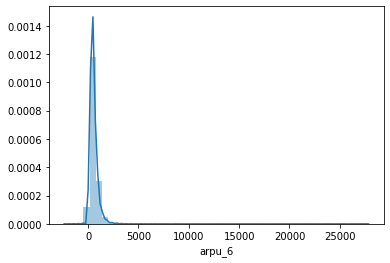

In [66]:
univariate(filteredData.arpu_6)

There are some of the negative values present in the data

count    98981.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


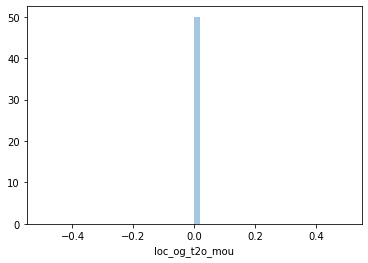

In [67]:
univariate(custdata.loc_og_t2o_mou)

count    29777.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


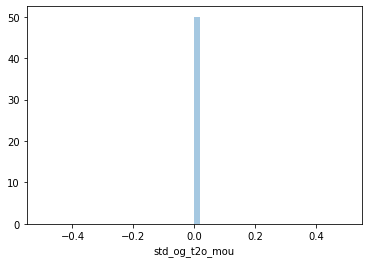

In [68]:
univariate(filteredData.std_og_t2o_mou)

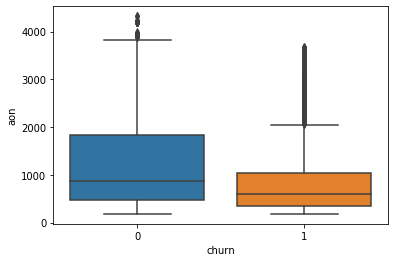

In [69]:
bivariate(filteredData.churn, filteredData.aon)

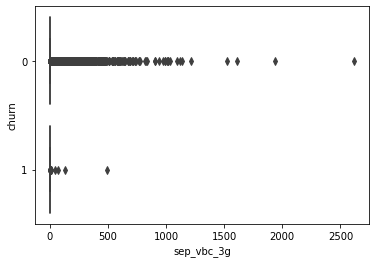

In [70]:
bivariate(filteredData.sep_vbc_3g, filteredData.churn)

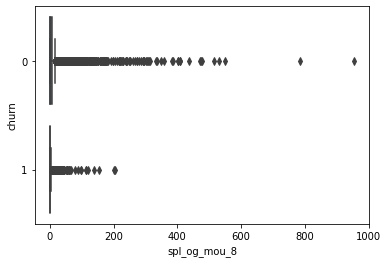

In [71]:
bivariate(filteredData.spl_og_mou_8, filteredData.churn)

In [72]:

pd.crosstab(filteredData.churn, filteredData.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [73]:
pd.crosstab(filteredData.churn, filteredData.sachet_3g_8)

sachet_3g_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,27,29,30,38,41
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24972,1609,399,184,106,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2369,48,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [75]:
#K-Sigma Technique
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [76]:
# cap outliers in the numeric columns
filteredData[num_cols] = filteredData[num_cols].apply(cap_outliers, axis=0)

## Some of the dataset are still null, Hence Preprocessing the data with Imputer

In [77]:
from sklearn.preprocessing import Imputer

In [78]:
mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

/Users/vijayalakshmi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [79]:
mean_imputer = mean_imputer.fit(filteredData)

In [80]:
imputed_df = mean_imputer.transform(filteredData.values)

In [81]:
imputed_df

array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
        -9.975000e+00, -7.555000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ..., -1.950000e+01,
        -1.779700e+02, -3.635350e+02],
       ...,
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  9.500000e+00,
        -1.887500e+01, -5.895000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  7.700000e+01,
         7.900000e-01,  6.719600e+02],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  2.455000e+02,
        -2.267000e+01,  1.265445e+03]])

### Modelling

In [82]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [83]:
filteredData['churn'] = pd.to_numeric(filteredData['churn'])

### Splitting the data for model Train and Test 

In [84]:
filteredData.replace(np.nan,0, inplace=True)

In [85]:
X = filteredData.drop("churn", axis = 1)
y = filteredData.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [86]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22500, 184)
(22500,)
(7501, 184)
(7501,)


## Grouping the categorical variables using mean

In [87]:
# aggregate the categorical variables
train = pd.concat([X_train, y_train], axis=1)
train.groupby('night_pck_user_6').churn.mean()


night_pck_user_6
-1.0    0.099165
 0.0    0.066797
 1.0    0.087838
Name: churn, dtype: float64

In [88]:
train.groupby('night_pck_user_7').churn.mean()

night_pck_user_7
-1.0    0.115746
 0.0    0.055494
 1.0    0.051282
Name: churn, dtype: float64

In [89]:
train.groupby('night_pck_user_8').churn.mean()

night_pck_user_8
-1.0    0.141108
 0.0    0.029023
 1.0    0.016194
Name: churn, dtype: float64

In [90]:
train.groupby('fb_user_6').churn.mean()

fb_user_6
-1.0    0.099165
 0.0    0.069460
 1.0    0.067124
Name: churn, dtype: float64

In [91]:
train.groupby('fb_user_7').churn.mean()

fb_user_7
-1.0    0.115746
 0.0    0.059305
 1.0    0.055082
Name: churn, dtype: float64

In [92]:
train.groupby('fb_user_8').churn.mean()

fb_user_8
-1.0    0.141108
 0.0    0.066887
 1.0    0.024463
Name: churn, dtype: float64

In [93]:
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [94]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 4525 to 22754
Data columns (total 6 columns):
night_pck_user_6    22500 non-null float64
night_pck_user_7    22500 non-null float64
night_pck_user_8    22500 non-null float64
fb_user_6           22500 non-null float64
fb_user_7           22500 non-null float64
fb_user_8           22500 non-null float64
dtypes: float64(6)
memory usage: 1.2 MB


## PCA

Principal Component Analysis (PCA) is used to explain the variance-covariance structure of a set of variables through linear combinations. It is often used as a dimensionality-reduction technique

In [95]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [96]:
pca.fit(X_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [97]:
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.88
1       21.61
2       27.62
3       32.86
4       37.02
5       40.57
6       43.23
7       45.76
8       48.05
9       50.24
10      52.26
11      54.15
12      55.83
13      57.44
14      58.99
15      60.49
16      61.86
17      63.15
18      64.41
19      65.64
20      66.86
21      68.05
22      69.16
23      70.21
24      71.22
25      72.19
26      73.09
27      73.98
28      74.84
29      75.68
30      76.50
31      77.30
32      78.06
33      78.81
34      79.53
35      80.22
36      80.90
37      81.54
38      82.16
39      82.76
40      83.34
41      83.89
42      84.42
43      84.93
44      85.43
45      85.93
46      86.42
47      86.89
48      87.34
49      87.78
50      88.21
51      88.63
52      89.03
53      89.40
54      89.76
55      90.12
56      90.46
57      90.79
58      91.10
59      91.41
60      91.71
61      92.01
62      92.29
63      92.56
64      92.82
65      93.08
66      93.32
67      93.56
68      93.80
69      94.03
70      94.25
71    

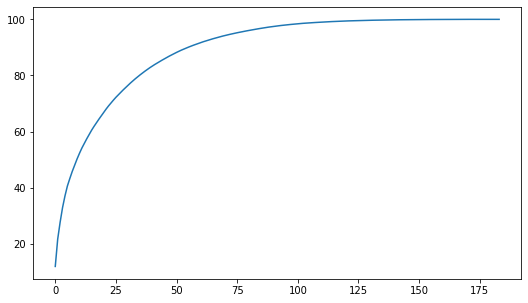

In [98]:


# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

### PCA and Logistic Regression

In [99]:


# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [100]:
# fit model
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=60,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [101]:
# check score on train data
pipeline.score(X_train, y_train)

0.8127555555555556

### Compute scores on Test data

In [102]:
y_pred = pipeline.predict(X_test)

### PCA : Scores

In [103]:

# creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)


total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', round(accuracy1))

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', round(sensitivity1,2))

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', round(specificity1,2))

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Confusion Matrix
[[5528 1363]
 [  90  520]]
Accuracy :  1.0
Sensitivity :  0.8
Specificity :  0.85
AUC:    	 0.9


### Hyperparameter tuning 

In [104]:
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

In [105]:
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# # fit model
# model.fit(X_train, y_train)



# print("Best AUC: ", model.best_score_)
# print("Best hyperparameters: ", model.best_params_)

# # creating Confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix')
# print(cm)


# total1=sum(sum(cm))
# #####from confusion matrix calculate accuracy
# accuracy1=(cm[0,0]+cm[1,1])/total1
# print ('Accuracy : ', round(accuracy1))

# sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
# print('Sensitivity : ', round(sensitivity1,2))

# specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
# print('Specificity : ', round(specificity1,2))

# # check area under curve
# y_pred_prob = model.predict_proba(X_test)[:, 1]
# print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

In [106]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRe...
                                                           multi_class='warn',
       

In [107]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

# creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)


total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', round(accuracy1))

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', round(sensitivity1,2))

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', round(specificity1,2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))


Best AUC:  0.8925011459990151
Best hyperparameters:  {'logistic__C': 4, 'logistic__penalty': 'l1', 'pca__n_components': 80}
Confusion Matrix
[[5528 1363]
 [  90  520]]
Accuracy :  1.0
Sensitivity :  0.8
Specificity :  0.85
AUC:    	 0.9


### Random Forest to choose the features

In [108]:
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)
# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [109]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   23.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

##### RF-  Time consumption is more

In [110]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8844443582110181
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


### Random Forest : Scores

In [111]:
# predict churn on test data
y_pred = model.predict(X_test)

# creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)


total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', round(accuracy1))

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', round(sensitivity1,2))

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', round(specificity1,2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Confusion Matrix
[[6784  107]
 [ 331  279]]
Accuracy :  1.0
Sensitivity :  0.98
Specificity :  0.46
AUC:    	 0.9


### Predict the important features

In [112]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

14


In [113]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.9s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=None, max_features=14,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [114]:
# OOB score
rf_model.oob_score_

0.9446222222222223

In [115]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)


total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', round(accuracy1))

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', round(sensitivity1,2))

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', round(specificity1,2))

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Confusion Matrix
[[6797   94]
 [ 327  283]]
Accuracy :  1.0
Sensitivity :  0.99
Specificity :  0.46
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


## Filtering Top 20 features

In [116]:
# predictors
features = filteredData.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)


In [117]:
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,total_ic_mou_8,5.923943
1,loc_ic_mou_8,5.128769
2,loc_ic_t2t_mou_8,3.915437
3,loc_og_t2m_mou_8,3.293306
4,last_day_rch_amt_8,2.960327
5,total_rech_amt_8,2.845175
6,total_rech_amt_diff,2.602671
7,loc_og_mou_8,2.599315
8,arpu_diff,2.448908
9,loc_ic_t2m_mou_8,2.236351


In [118]:
top_n = 20
top_features = feature_importance.variables[0:top_n]

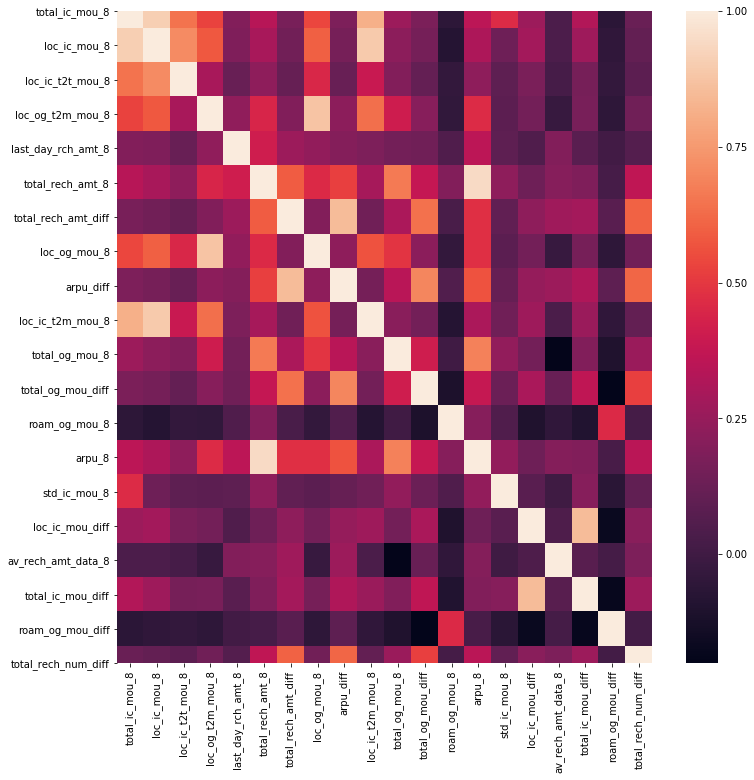

In [119]:
plt.rcParams["figure.figsize"] =(12,12)
sns.heatmap(data=X_train[top_features].corr())

In [120]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

### Apply Logistic Regression

In [121]:
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [122]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ra

In [123]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

# creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)


total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', round(accuracy1))

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', round(sensitivity1,2))

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', round(specificity1,2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Best AUC:  0.8744135096870688
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}
Confusion Matrix
[[6797   94]
 [ 327  283]]
Accuracy :  1.0
Sensitivity :  0.99
Specificity :  0.46
AUC:    	 0.88


In [124]:
logistic_model = model.best_estimator_.named_steps['logistic']
intercept = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])


In [125]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [126]:
# concatenate dataframes
coefficients = pd.concat([intercept, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.495207,-1.150839,-0.689545,-1.4521,0.225142,-0.04482,0.234104,0.091136,-0.80225,0.877085


### Insights about the Analysis

1. Every month there are around 400 to 500 customers are not using services. In 8th month nearly 800+ customers are not using services.
2. Reasons are recharges needed for Outgoing calls and incoming calls and Roaming charges.
3. Good Offer packages for calls and data during roaming would help customers to stay on the same network.
4. Business Team should collect customer queries and complaint and provide better services according to the needs of customers tenure.
